[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/AetherrAkuma/Real-ESRGAN-Colab/blob/master/Real_ESRGAN_Colab_0_5.ipynb)
# Upscale Using Real ESRGAN
Created by Aetherr Akuma

*Heavily Inspired by Official Colab Version of Real-ESRGAN* [click here to redirect](https://colab.research.google.com/drive/1k2Zod6kSHEvraybHl50Lys0LerhyTMCo?usp=sharing
) 




### Follow all the Steps Needed
 1.  Run the Pre exquisite Files in order to this to work. **its in the bottom of this text**
 2. Next Go to the Upload Section where you will place your Low af quality image/picture. Make sure to follow all instructions there. We Currently have 3 options: 
  - Local Upload
  - Google Drive
  - Gallery-dl
 3. When Done, Your Next Step is the Settings where you will select some really interesting things to do on your images. **Make Sure you Run that First as they contains important commands**  
 4. If All are Ready, Then Run the Real-ESRGAN Code Block Below it and Wait Patiently. The Speed Depends on how many image contains.
 5. Now that Upscaling is done, You have 2 options
  1. Show the original image & the upscaled image
  2. Download/Move your Image to your Personal Storage
  3. Uplaod your image to third party cdn or cloud e.g catbox, fileditch
 6. If you want to Upload Videos Just Scroll Down until you see the Video Section


# Pre-Exquisite Downloads

Download and Setup for Real-ESRGAN to work as well as its required files and modules


It can take for about 5-10 mins

In [5]:
import os, shutil, subprocess, cv2, glob, torch, time, json
from google.colab import files, drive, runtime
import matplotlib.pyplot as plt
from IPython.display import HTML, clear_output, display
from ipywidgets import interact, interactive, fixed, interact_manual, widgets
from base64 import b64encode

!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json
Paths used for configuration of notebook: 
    	
      - Validating: OK
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json


In [1]:
# Run this First before Proceeding to other code blocks

import os, shutil, subprocess, cv2, glob, torch, time
from google.colab import files, drive, runtime
import matplotlib.pyplot as plt
from IPython.display import HTML, clear_output, display
from ipywidgets import interact, interactive, fixed, interact_manual, widgets
from base64 import b64encode

!jupyter nbextension enable --py widgetsnbextension

class RuntimeSelection(Exception):
  pass

if torch.cuda.is_available() == False:
  raise RuntimeSelection("There is no GPU on the Current Runtime.\n Please Change the Runtime Type in Runtime -> Change Runtime Type -> GPU -> Save")
else:
  print("GPU Runtime Available.\nSetting Up Please Wait....")

!git clone https://github.com/xinntao/Real-ESRGAN.git
# !wget https://nekofile.eu.org/ce4bb7e12cff137370e12qf0t
# !mv ce4bb7e12cff137370e12qf0t config.conf
%cd Real-ESRGAN
# Set up the environment
!pip install basicsr 
!pip install facexlib 
!pip install gfpgan 
!pip install -r requirements.txt 
# !pip install -U gallery-dl
!pip install ffmpeg-python
!pip install ipywidgets 
!python setup.py develop
clear_output()
print("Download Done!")

Download Done!


# Upload (Image)

#### Upload your image based on your selected mode:
 - Local Upload
 - Google Drive
 - Gallery-dl (Not Available "Yet")
---
#### Local Upload
You can Upload your Image directly to the runtime storage but it can also be much slower compare to other modes

---
#### Google Drive
 Transfer your Image inside your Goggle Drive Folder and Put it inside the Runtime. Faster compare to Local Upload. ***Required to Authorize your Google Drive Access here, Just follow the pop up google shows***

---
#### Gallery-DL
For those who want to Download the Image like pixiv then directly put it here

*NOTE: This is for Experienced User and can make your brain fried if you didn't know extractors*

NOT AVAILABLE YET

---







In [2]:
class GoogleDriveError(Exception):
    pass

def up_input(x):
  global upload_dir
  upload_dir = x
def out_input(y):
  global output_dir
  output_dir = y


def do_it(btn):
  authorize = widgets.Button(
      value="",
      description='Authorize',
      disabled=False,
      button_style='success', # 'success', 'info', 'warning', 'danger' or ''
      icon='check', # (FontAwesome names without the `fa-` prefix)
  )
  # To Clear Past Operations
  upload_folder = "upload"
  result_folder = "result"

  if os.path.isdir(upload_folder):
      shutil.rmtree(upload_folder)
  if os.path.isdir(result_folder):
      shutil.rmtree(result_folder)
  os.mkdir(upload_folder)
  os.mkdir(result_folder)
  # -------------------------- #

  clear_output()
  if mode.value == "Local Upload":
    print("Upload/Drag & Drop your Image here")
    uploaded = files.upload()
    for filename in uploaded.keys():
      dst_path = os.path.join(upload_folder, filename)
      print(f'move {filename} to {dst_path}')
      shutil.move(filename, dst_path)
    print("Upload Completed!")

  if mode.value == "Google Drive":
    print("Type your Directory of the Folder inside your Google Drive\nTo Add SubFolder Just Put / next to the name of the parent folder\nDon't Remove the Forward Slash.")
    
    # Buttons #
    interact(up_input, x=widgets.Text(
    value='/',
    placeholder='Folder to Fetch your Images',
    description='Upload Directory: ',
    disabled=False
  ));

    interact(out_input, y=widgets.Text(
    value='/',
    placeholder='Folder to Get the Upscaled Images',
    description='Output Directory: ',
    disabled=False
  ));
    # ------------------------------ #

    display(authorize)
    authorize.on_click(gdrive_process)
  
  


def gdrive_process(auth_btn):
  clear_output()
  drive.mount('/content/drive')
  print("Successfully Authorized. Now Transferring...")
  if os.path.exists("/content/drive/MyDrive/" + upload_dir):
    for i in os.listdir(f"/content/drive/MyDrive/{upload_dir}"):
        shutil.copy(f"/content/drive/MyDrive/{upload_dir}/{i}", f"/content/Real-ESRGAN/upload/{i}")
        print(f'Copied {i} to /content/Real-ESRGAN/upload/')
    else:
      print("Successfully Copied All Images")
  else:
    raise GoogleDriveError(f"Google Drive Folder \"{upload_dir}\" does not Exist on your Drive.\nPlease Specify the Existing Folder in your Drive.")
  
  clear_output()
  print("Upload Process Complete! Please Proceed to the Next Step")


upload_dir = output_dir = modee = ""
print("Choose What Mode of Upload to Execute")
mode = widgets.Dropdown(
    options=[('Local Upload'), ('Google Drive')],
    value="Local Upload",
    description='Method Upload:',
)
next_1 = widgets.Button(
    value="conf",
    description='Confirm',
    disabled=False,
    button_style='info', # 'success', 'info', 'warning', 'danger' or ''
    tooltip=mode.value,
    icon='check' # (FontAwesome names without the `fa-` prefix)
)


display(mode, next_1)
next_1.on_click(do_it)

Upload/Drag & Drop your Image here


Saving 1553233893238906880_1.jpg to 1553233893238906880_1.jpg
move 1553233893238906880_1.jpg to upload/1553233893238906880_1.jpg
Upload Completed!


# Settings (Image)
Before Starting Choose what you what to do and need to do to your Uploaded Image

 1. Model:
  - General v3 - for General use like real life images (can use denoise)
  - General plus - Like general v3 but no denoise
  - Anime - For Anime images like artworks
  - Anime Video - Same for Anime but this is artifact prone and only useful for videos
 2. Outscale:
  - The final upsampling scale of the image
 3. Denoise:
  - Remove Noise from the image
 4. Tile:
  - Tile size, 0 for no tile during testing
 5. fp32:
  - Use fp32 precision during inference. Default: fp16 (half precision)
 6. Ext:
  - Extension of the image by the end of the upscaling (can be changed if different from the source)
  - Options: auto | jpg | png, auto means using the same extension as inputs. Default: auto
 7. Suffix:
  - Suffix of the restored image. Default: outx
 8. face_enhance:
  - Whether to use GFPGAN to enhance face.

In [3]:
class outscale_settings():
  def value(x):
    global outscale
    outscale = x
    print(f"Your Image will be Upscaled {outscale}x")
    outscale = f"--outscale {outscale}"

  def select(x):
    clear_output()
    print("Choose how many scale you want to do to your image.\n Higher = High Quality & Size Recommended: 2 or 4")
    interact(outscale_settings.value, x=widgets.IntText(
      value=4,
      description='Outscale:',
      disabled=False
  ));

    btn_outscale = widgets.Button(
      value=".",
      description='Confirm',
      disabled=False,
      button_style='success', # 'success', 'info', 'warning', 'danger' or ''
      tooltip='Proceed to the next Section',
      icon='check' # (FontAwesome names without the `fa-` prefix)
  )
    display(btn_outscale)
    btn_outscale.on_click(tile_settings.select)

class tile_settings():
  def value_update(y):
    global tile
    tile = y
    print(f"{tile} Tile size")
    tile = f"--tile {tile}"
    
  def select(o):
    clear_output()
    print("Choose How Large is Tile Size. Commonly Used for Large Size Image to avoid running out of cuda memory\n Recommended: 200 or 400")
    interact(tile_settings.value_update, y=widgets.IntSlider(
      value=200,
      min=0,
      max=2000,
      step=1,
      description='Tile:',
      orientation='horizontal',
      readout=True,
      readout_format='d'
  ));
    btn_tile = widgets.Button(
      value=".",
      description='Select',
      disabled=False,
      button_style='info', # 'success', 'info', 'warning', 'danger' or ''
      tooltip='Proceed to the next Section',
      icon='check' # (FontAwesome names without the `fa-` prefix)
  )
    display(btn_tile)
    btn_tile.on_click(fp_settings.select)

class fp_settings():
  def update_value(x):
    global fp
    fp = x
    if fp == "fp32":
      fp = "--fp32"
    elif fp == "fp16 (default)":
      fp = ""

  def select(x):
    clear_output()
    print("Choose what to Do\n fp16 (half precision but faster)\n fp32 - fp32 precision during inference")
    interact(fp_settings.update_value, x=widgets.RadioButtons(
    options=['fp16 (default)', 'fp32'],
    description='fp settings:',
    disabled=False
));
    btn_fp = widgets.Button(
    value=".",
    description='Confirm',
    disabled=False,
    button_style='info', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Proceed to the next Section',
    icon='check' # (FontAwesome names without the `fa-` prefix)
)
    display(btn_fp)
    btn_fp.on_click(denoise_settings.select)

class denoise_settings():
  def update(x):
    global denoise
    denoise = x
    if denoise == "No Denoise":
      denoise = ""
    elif denoise == "Weak Denoise":
      denoise = "--dn 0"
    elif denoise == "Strong Denoise":
      denoise = "--dn 1"
    else:
      pass

  def select(x):
    clear_output()
    btn_denoise = widgets.Button(
      value=".",
      description='Confirm',
      disabled=False,
      button_style='info', # 'success', 'info', 'warning', 'danger' or ''
      tooltip='Proceed to the next Section',
      icon='check' # (FontAwesome names without the `fa-` prefix)
  )
    if model_select.value == "realesr-general-x4v3":
      print("Denoising the Image based on your Selection:\n No Denoise - Self Explanatory\n Weak Denoise - Keeping Noise in Minimal Effect \n Strong Denoise - Removing Any Noise that will be Detected")
      interact(denoise_settings.update, x=widgets.RadioButtons(
      value='No Denoise',
      options=['No Denoise', 'Weak Denoise', 'Strong Denoise'],
  #    value='pineapple', # Defaults to 'pineapple'
  #    layout={'width': 'max-content'}, # If the items' names are long
      description='Denoising:',
      disabled=False
  ));
      display(btn_denoise)
      btn_denoise.on_click(faceenhance_settings.select)
    else:
      print("Skipping Denoising.\n Reason: Anime aren't Supported by denoiser")
      global denoise
      denoise = ""
      btn_denoise.description = "Proceed"
      display(btn_denoise)
      btn_denoise.on_click(faceenhance_settings.select)

class faceenhance_settings():
  def update(x):
    global faceenhance
    if x == 'No Face Enhance':
      faceenhance = ""
    elif x == "Use Face Enhance":
      faceenhance = "--face_enhance"
    else:
      pass

  def select(x):
    clear_output()
    btn_face = widgets.Button(
    value=".",
    description='Confirm',
    disabled=False,
    button_style='info', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Proceed to the next Section',
    icon='check' # (FontAwesome names without the `fa-` prefix)
)
    if model_select.value == "realesr-general-x4v3" or model_select.value == "RealESRGAN_x4plus":
      print("Enhancing Blurry, Not Clear, Old Real Face to Clear Faces\nOnly for Real Faces will work here.")
      interact(faceenhance_settings.update, x=widgets.RadioButtons(
      value='No Face Enhance',
      options=['No Face Enhance', 'Use Face Enhance'],
  #    value='pineapple', # Defaults to 'pineapple'
  #    layout={'width': 'max-content'}, # If the items' names are long
      description='Face Enhance:',
      disabled=False
  ));
      
      display(btn_face)
      btn_face.on_click(extension_suffix_settings.select) # Yeah i know its long 
    else:
      global faceenhance
      print("Skipping Face Enhance.\n Reason: Only Real Face will work")
      faceenhance = ""
      btn_face.description = "Proceed"
      display(btn_face)
      btn_face.on_click(extension_suffix_settings.select)

class extension_suffix_settings():
  def update_ext(x):
    global ext
    ext = f"--ext {x}"

  def update_suffix(x):
    global suffix
    suffix = f"--suffix {x}"

  def select(x):
    clear_output()
    print("Will Change the Extension if the Original Image is Different Compare to The Choice here")
    interact(extension_suffix_settings.update_ext, x=widgets.Dropdown(
    options=['png', 'jpg', 'auto'],
    value='png',
    description='extension:',
    disabled=False,
));
    print("Any word that will be Placed on the end of the filename")
    interact(extension_suffix_settings.update_suffix, x=widgets.Text(
    value='outx',
    placeholder='Anything that ends in the name of the image',
    description='Suffix:',
    disabled=False
));  
    btn_extsuff = widgets.Button(
    value=".",
    description='Confirm',
    disabled=False,
    button_style='Success', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Proceed to the next Section',
    icon='check' # (FontAwesome names without the `fa-` prefix)
)
    display(btn_extsuff)
    btn_extsuff.on_click(recollect)

def recollect(x):
  global setting, model
  model = f"-n {model_select.value}"
  setting = f"{model} -i upload {outscale} {tile} {fp} {ext} {suffix} {denoise} {faceenhance}"
  clear_output()
  print("Setting has been Set and Ready to Apply in Real-ESRGAN")


model_select = widgets.Dropdown(
    options=[('General Model v3', 'realesr-general-x4v3'), ('General Model plus', 'RealESRGAN_x4plus'), ('Anime Model', 'RealESRGAN_x4plus_anime_6B'), ('Anime Video Model', 'realesr-animevideov3')],
    value='RealESRGAN_x4plus_anime_6B',
    description='Model Selection:',
    disabled=False
)
btn_model = widgets.Button(
    value=".",
    description='Confirm',
    disabled=False,
    button_style='info', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Proceed to the next Section',
    icon='check' # (FontAwesome names without the `fa-` prefix)
)

display(model_select, btn_model)
btn_model.on_click(outscale_settings.select)

Setting has been Set and Ready to Apply in Real-ESRGAN


# Inference/Upscale (Image)

Now Run this to upscale your Image and Wait Patiently

Note: You must run the Settings first before proceeding here

Loading your Image Please Wait...
All Image/s Has been Loaded!


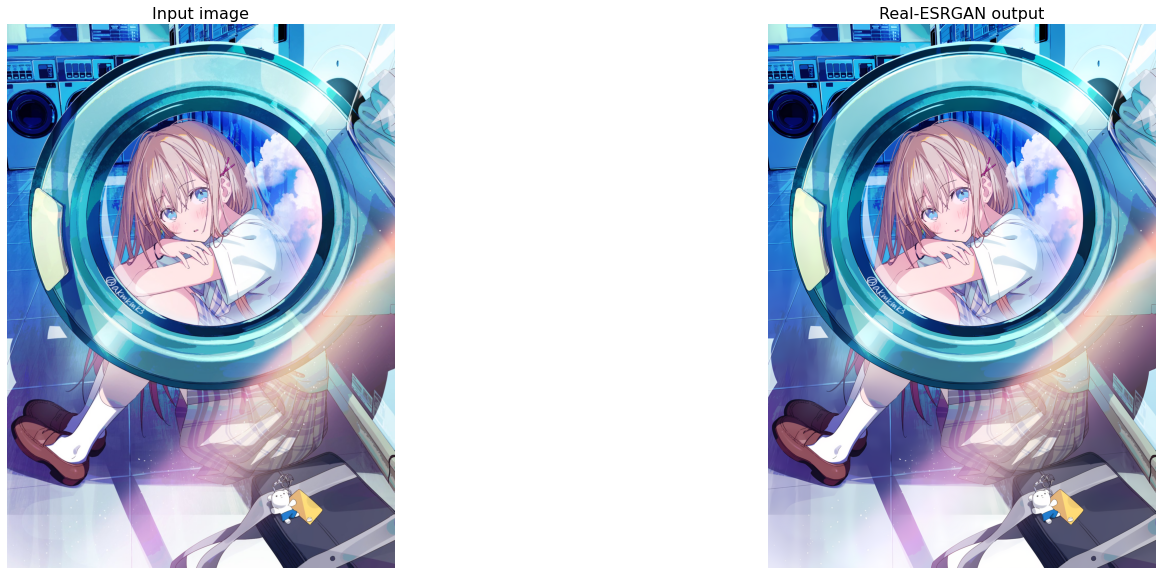

In [4]:
def show_images(x):
  clear_output()
  print("Loading your Image Please Wait...")
  # display each image in the upload folder
  input_folder = 'upload'
  result_folder = 'results'
  input_list = sorted(glob.glob(os.path.join(input_folder, '*')))
  output_list = sorted(glob.glob(os.path.join(result_folder, '*')))
  for input_path, output_path in zip(input_list, output_list):
    img_input = imread(input_path)
    img_output = imread(output_path)
    displayy(img_input, img_output)

def displayy(img1, img2):
  fig = plt.figure(figsize=(25, 10))
  ax1 = fig.add_subplot(1, 2, 1) 
  plt.title('Input image', fontsize=16)
  ax1.axis('off')
  ax2 = fig.add_subplot(1, 2, 2)
  plt.title('Real-ESRGAN output', fontsize=16)
  ax2.axis('off')
  ax1.imshow(img1)
  ax2.imshow(img2)

def imread(img_path):
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  return img

btn_show = widgets.Button(
    value=".",
    description='Show Image/s',
    disabled=False,
    button_style='success', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Proceed to the next Section',
    icon='check' # (FontAwesome names without the `fa-` prefix)
)

!python inference_realesrgan.py {setting}
clear_output()
print("Upscaling Done\n Want to show all Image?")
display(btn_show)
btn_show.on_click(show_images)

# Download/Send to Third party Cloud (Image)

You have 3 Options:

1. Direct Download
2. Google Drive
3. Third party Clouds

---

#### Direct Download:
You can Directly Download all your image into a zip but this is slow compare to others

---

#### Google Drive:
Transfering/Moving your upscaled image to your designated output directory you've input on upload. If the directory does not exist it will create new folder named after your input

---

#### Third party clouds:
We have 3 providers for now:
1. catbox.moe
2. fileditch.com
3. loli.solutions

**Under Constructions ehe~**

---

In [7]:
from pygments import token

def download_now(x):
  clear_output()
  print("Please WAIT...")
  zip_filename = f'{zipname}.zip'
  if os.path.exists(zip_filename):
    os.remove(zip_filename)
  os.system(f"zip -r -j {zip_filename} results/*")
  files.download(zip_filename)
  print("Downloaded Files Successfully!\n All Operations are now Done. Enjoy your Image Result :>")

def gdrive_download():
  if os.path.exists(f"/content/drive/MyDrive/{output_dir}") == False:
      os.system(f"mkdir /content/drive/MyDrive/{output_dir}")
  else:
    pass
  for i in os.listdir("/content/Real-ESRGAN/results/"):
    try:
      shutil.move(f'/content/Real-ESRGAN/results/{i}', f'/content/drive/MyDrive/{output_dir}/{i}')
      print(f"The File {i} has been Transfered to your Google Drive")
    except IsADirectoryError:
      pass
  print("Transfer Done!\n All Operations are now Done. Enjoy your Image Result :>")

class thirdpartycloud():  
  def gate(x):
    if tp_cloud == "loli.solutions":
      print("Pass your Token here. To Get the token register on loli.solutions then login\n Once you're done head over to the 'Change Token' then copy your token and paste it here")
      interact(thirdpartycloud.lolisafe_token_update, c=widgets.Text(
        value='',
        placeholder='Your Token here',
        description='Token: ',
        disabled=False
  ));
      btn_lolisol = widgets.Button(
      value=".",
      description='Enter',
      disabled=False,
      button_style='info', # 'success', 'info', 'warning', 'danger' or ''
      tooltip="Download Button to start",
      icon='check' # (FontAwesome names without the `fa-` prefix)
  )
      display(btn_lolisol)
      btn_lolisol.on_click(thirdpartycloud.lolisafe)
    elif tp_cloud == "fileditch.com":
      thirdpartycloud.fileditch()
    elif tp_cloud == "nekofile.eu.org":
      thirdpartycloud.nekofile()
  

  def lolisafe_token_update(c):
    global token
    token = c
  
  def lolisafe(x):
    clear_output()
    for i in os.listdir("/content/Real-ESRGAN/results/"):
      !curl -H "token: {token}" -F "files[]=@/content/Real-ESRGAN/results/{i}" -o /content/Real-ESRGAN/results/inquire.json https://loli.solutions/api/upload
      with open("/content/Real-ESRGAN/results/inquire.json", "r") as report:
        FileContent = json.load(report)
      with open("/content/Real-ESRGAN/results/listoflinks.txt", "w+") as txt:
        txt.writelines(FileContent["files"][0]["url"])
    else:
      files.download("/content/Real-ESRGAN/results/listoflinks.txt")
    print("Process Done!\n Your Image Links are in the 'listoflinks.txt' that has been downloaded for you!")

  def fileditch():
    for i in os.listdir("/content/Real-ESRGAN/results/"):
      !curl -F "files[]=@/content/Real-ESRGAN/results/{i}" -o /content/Real-ESRGAN/results/inquired.json https://up1.fileditch.com/upload.php
      with open("/content/Real-ESRGAN/results/inquired.json", "r") as parsed:
        FileContent = json.load(parsed)
      with open("/content/Real-ESRGAN/results/listoflinks.txt", "w+") as txt:
        txt.writelines(FileContent["files"][3])
    else:
      files.download("/content/Real-ESRGAN/results/listoflinks.txt")
    print("Process Done!\n Your Image Links are in the 'listoflinks.txt' that has been downloaded for you!")

  def nekofile():
    links = []
    for i in os.listdir("/content/Real-ESRGAN/results/"):
      if i != "link.txt":
        !curl -F "file=@//content/Real-ESRGAN/results/{i}" -o /content/Real-ESRGAN/results/link.txt https://nekofile.eu.org/
      else:
        pass
      with open("/content/Real-ESRGAN/results/link.txt", "r") as lnk:
        links.append(lnk.read())
    else:
      for z in links:
        with open("/content/Real-ESRGAN/results/listoflinks.txt", "w+") as llk:
          llk.writelines(z)
      else:
        files.download("/content/Real-ESRGAN/results/listoflinks.txt")
        print("Process Done!\n Your Image Links has been Listed and Will be Downloaded for you!")


def tpcloud_update(x):
  global tp_cloud
  tp_cloud = x
  
def dl_update(y):
  global zipname, btn_dl
  zipname = y

def choice_gate(x):
  clear_output()
  if download_mode == "Direct Download":
    interact(dl_update, y=widgets.Text(
    value='',
    placeholder='Name of your Zip file',
    description='Zip name: ',
    disabled=False
  ));
    btn_dl = widgets.Button(
      value=".",
      description='Confirm',
      disabled=False,
      button_style='info', # 'success', 'info', 'warning', 'danger' or ''
      tooltip="Download Button to start",
      icon='check' # (FontAwesome names without the `fa-` prefix)
  )
    display(btn_dl)
    btn_dl.on_click(download_now)
  elif download_mode == "Google Drive":
    gdrive_download()
  elif download_mode == "Third Party Clouds":
    interact(tpcloud_update, x=widgets.Dropdown(
    options=['loli.solutions', 'fileditch.com', 'nekofile.eu.org'],
    value='fileditch.com',
    description='Providers: ',
    disabled=False,
));
    btn_tpcloud = widgets.Button(
      value=".",
      description='Confirm',
      disabled=False,
      button_style='info', # 'success', 'info', 'warning', 'danger' or ''
      tooltip="Download Button to start",
      icon='check' # (FontAwesome names without the `fa-` prefix)
  )
    display(btn_tpcloud)
    btn_tpcloud.on_click(thirdpartycloud.gate)

    



def dl_choice(x):
  global download_mode
  download_mode = x



#-----------  Main -------------- #
interact(dl_choice, x=widgets.Dropdown(
    options=['Direct Download', 'Google Drive', 'Third Party Clouds'],
    value='Direct Download',
    description='download mode:',
    disabled=False,
));
btn_conf = widgets.Button(
    value=".",
    description='Confirm',
    disabled=False,
    button_style='info', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Proceed to the next Section',
    icon='check' # (FontAwesome names without the `fa-` prefix)
)

display(btn_conf)
btn_conf.on_click(choice_gate)





interactive(children=(Dropdown(description='Providers: ', index=1, options=('loli.solutions', 'fileditch.com',…

Button(button_style='info', description='Confirm', icon='check', style=ButtonStyle(), tooltip='Download Button…

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 10.6M  100    49  100 10.6M      6  1373k  0:00:08  0:00:07  0:00:01  144k


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Process Done!
 Your Image Links has been Listed and Downloaded!
